## Library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Membaca dan Menampilkan Gambar

In [2]:
img = cv2.imread("MHF3.jpg")

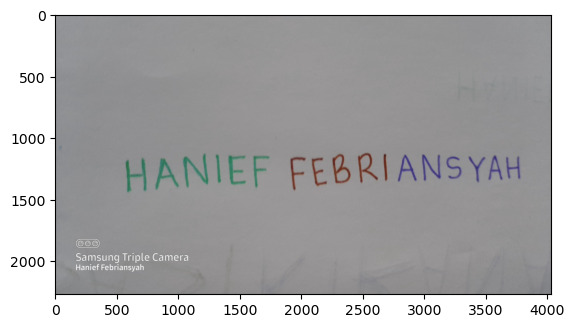

In [3]:
plt.imshow(img)

## Mengubah Format Gambar

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

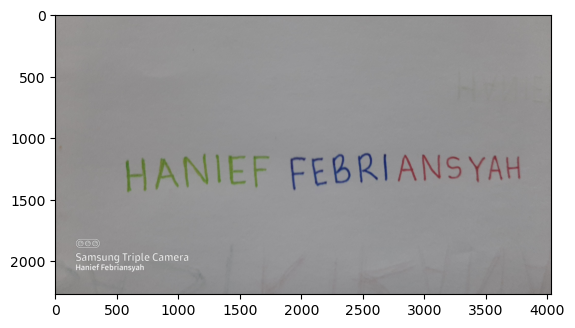

In [5]:
plt.imshow(img)

## Pemurnian Warna

In [6]:
[baris,kolom] = img.shape[:2]

In [7]:
for x in range(baris):
    for y in range(kolom):
        max1=0
        max2=0
        for z in range(3):
            if(max1==0):
                max1=img[x,y,z]
                imax1=z
            elif(max1<img[x,y,z]):
                max1=img[x,y,z]
                imax1=z
            elif(max2<img[x,y,z]):
                max2=img[x,y,z]
                imax2=z
        if((img[x,y,imax1]-img[x,y,imax2])>10):
            for z in range(3):
                if(z!=imax1):
                    img[x,y,z]=0

## Mencerahkan Gambar

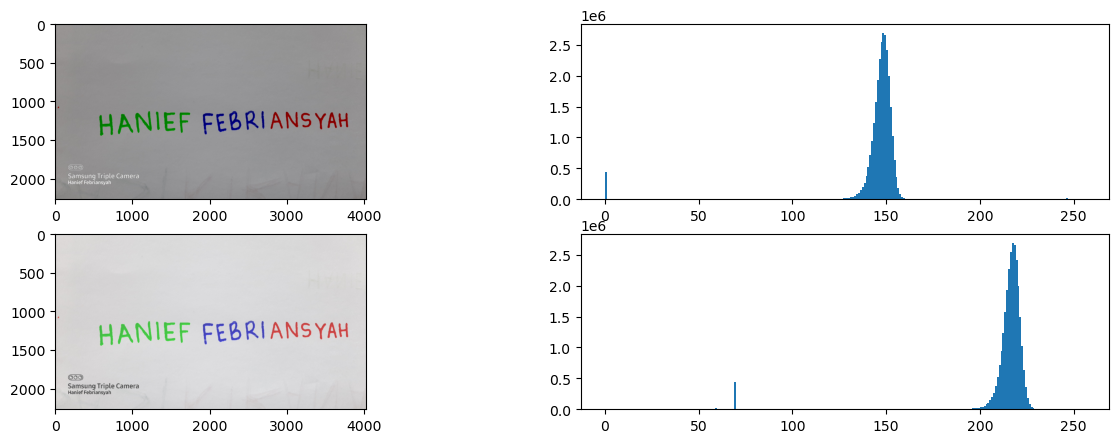

In [8]:
#Proses Mencerahkan
beta = 69
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = img[x,y] + beta
        citra_cerah[x,y] = gyx
        
citra_cerah = citra_cerah.astype(np.uint8)

#menampilkan
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(), 256, [0,256])
plt.show()

## Deteksi Warna (Soal 1)

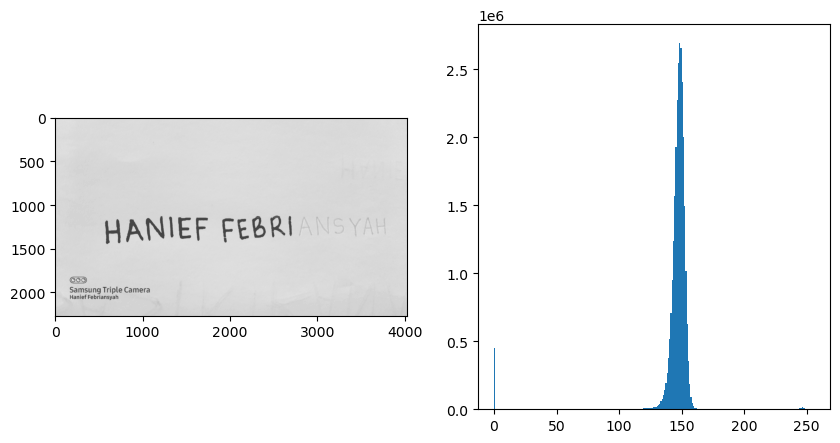

In [9]:
Merah = citra_cerah[:,:,0]
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(Merah, cmap='gray')#Merah
axs[1].hist(img.ravel(), 256,[0, 256])
plt.show()

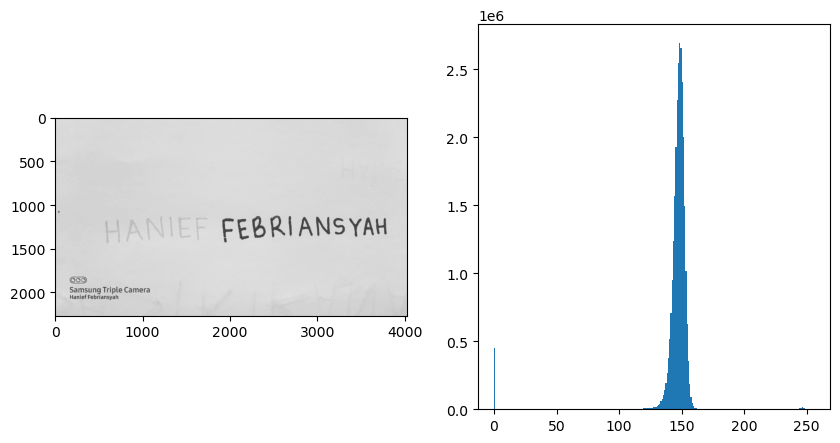

In [10]:
Hijau = citra_cerah[:,:,1]
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(Hijau, cmap='gray')#Hijau
axs[1].hist(img.ravel(), 256,[0, 256])
plt.show()

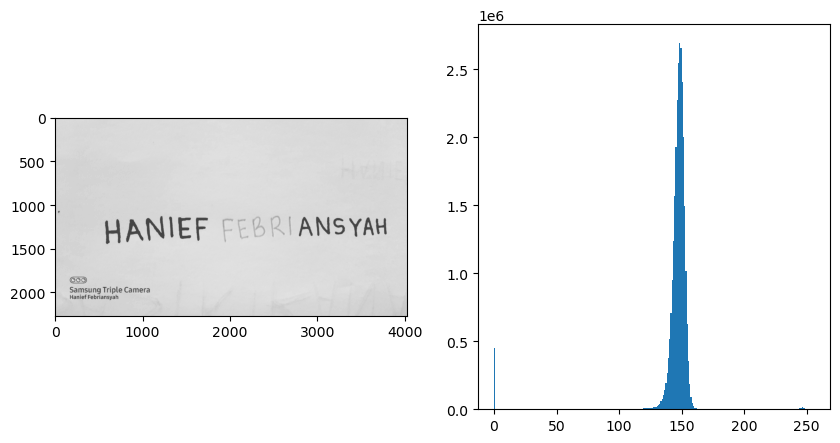

In [11]:
Biru = citra_cerah[:,:,2]
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(Biru, cmap='gray')#Biru
axs[1].hist(img.ravel(), 256,[0, 256])
plt.show()

## Ambang Batas (Soal 2)

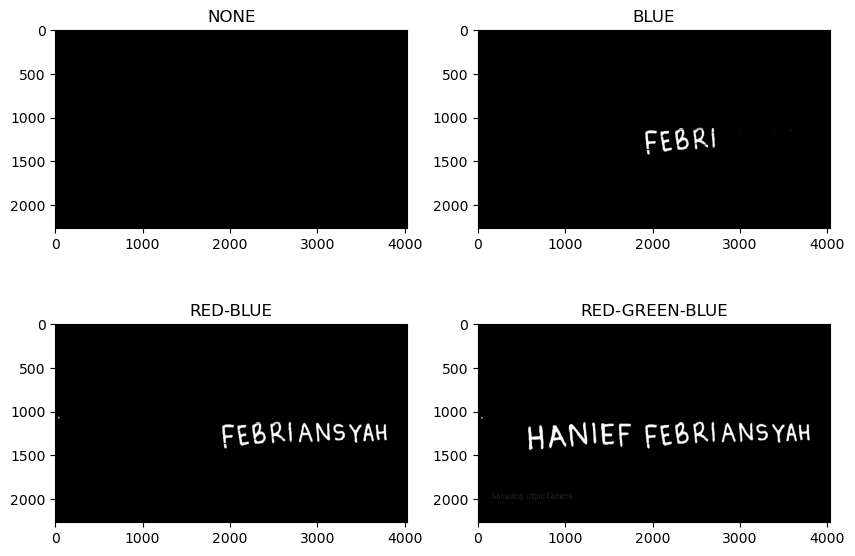

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(2, 2, figsize = (10,7))

(thresh, binary1) = cv2.threshold(gray, 7, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap='binary')
axs[0,0].set_title('NONE')

(thresh, binary2) = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
axs[0,1].imshow(binary2, cmap='binary')
axs[0,1].set_title('BLUE')

(thresh, binary3) = cv2.threshold(gray, 55, 255, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap='binary')
axs[1,0].set_title('RED-BLUE')

(thresh, binary4) = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap='binary')
axs[1,1].set_title('RED-GREEN-BLUE')

plt.show()